## Apply Cellpose Cyto3 pretrained model

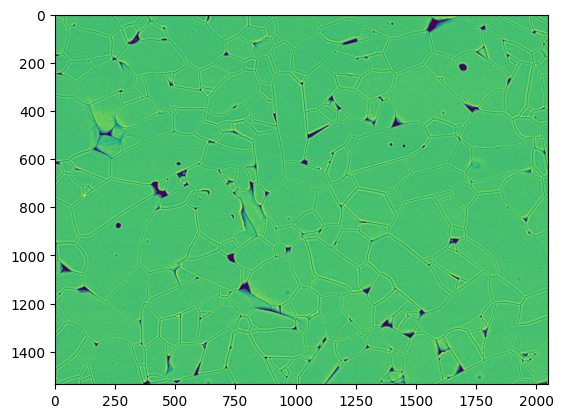

In [1]:
import napari
viewer = napari.Viewer()

from skimage.io import imread
from pathlib import Path
from matplotlib import pyplot as plt
import napari

tnia_images_path = Path(r"D:/images/tnia-python-images")
tnia_images_path = Path(r"/home/bnorthan/images/tnia-python-images/")
parent_path = tnia_images_path / "imagesc/2024_12_19_sem_grain_size_revisit"
image = imread(str(parent_path / ("211122_AM_Al2O3_SE_021.ome.tiff")))

plt.imshow(image)

In [2]:
from cellpose import models, io
import logging
#logging.basicConfig(level=logging.DEBUG)
mod = models.Cellpose(gpu=True, model_type="cyto3")

/home/bnorthan/mambaforge/envs/easy_augment_pytorch/lib/python3.12/site-packages/cellpose/resnet_torch.py:271: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = tor

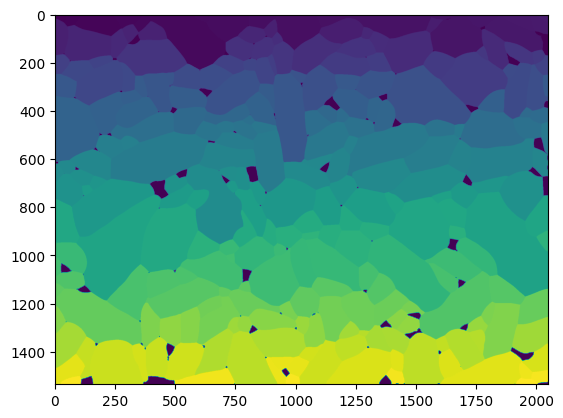

In [3]:
segmented = mod.eval(image, diameter=120)

plt.imshow(segmented[0])

In [14]:
from skimage.io import imsave
import os
imsave(os.path.join(parent_path, "cellpose_cyto3_120_segmented.tif"), segmented[0])

C:\Users\bnort\AppData\Local\Temp\ipykernel_34776\578262786.py:3: UserWarning: D:\images\tnia-python-images\imagesc\2024_12_19_sem_grain_size_revisit\cellpose_cyto3_120_segmented.tif is a low contrast image
  imsave(os.path.join(parent_path, "cellpose_cyto3_120_segmented.tif"), segmented[0])


In [4]:
viewer.add_image(image)
viewer.add_labels(segmented[0])

<Labels layer 'Labels' at 0x7a0fd7d27ce0>